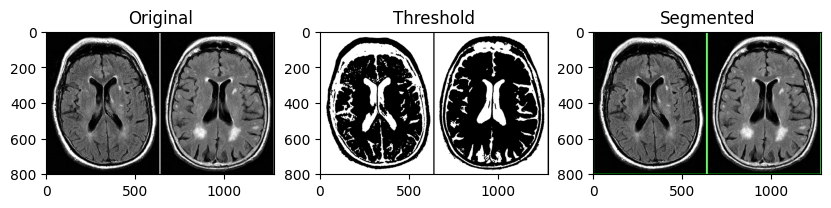

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
image = cv2.imread('/content/sample_data/brain_tumor.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
ret, thresh = cv2.threshold(blurred, 45, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(image, contours, -1, (0, 255, 0), 2)
plt.figure(figsize=(10, 6))
plt.subplot(1, 3, 1)
plt.title("Original")
image_path = '/content/sample_data/brain_tumor.jpg'
if cv2.haveImageReader(image_path):
    original_image = cv2.imread(image_path)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
else:
    print(f"Error: Could not read image from {image_path}")
    plt.text(0.5, 0.5, f"Image not found: {image_path}", ha='center', va='center', color='red')

plt.subplot(1, 3, 2)
plt.title("Threshold")
plt.imshow(thresh, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Segmented")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()